    MOVIE RECOMMENDATION ENGINE

    Objective: 
        * Given a user 'x' and an unrated movie 'y', can we predict how the user will rate this movie?
        * Using the rating, can we recommend similar movies?

    Data:
        * Movie dataset (details about the movie)
        * Ratings dataset (movie ratings)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualization
from surprise import Reader, Dataset # reading and dataset into surprise

%matplotlib inline

In [2]:
movie_ratings = pd.read_csv("movie_ratings_features.csv")

In [20]:
ratings = pd.read_csv("../ml-latest-small/ratings.csv").drop(labels='timestamp', axis=1)

In [3]:
movie_ratings.head()

,movieId,title,genres,userId,rating,global_avg_rating,movie_avg_rating,user_avg_rating,sim_movie_1,sim_movie_2,sim_movie_3,sim_movie_4,sim_movie_5,sim_user_1,sim_user_2,sim_user_3,sim_user_4,sim_user_5
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,3.501557,3.920930,4.366379,4.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,3.0,3.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,3.501557,3.920930,4.366379,4.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,3.0,3.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,3.501557,3.259615,4.366379,3.0,2.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,3.0
3,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,3.501557,3.259615,4.366379,3.0,2.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,3.0
4,6,Heat (1995),Action|Crime|Thriller,1,4.0,3.501557,3.946078,4.366379,4.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,3.0,3.0


In [10]:
# Drop "title", "genres", "movieId" and "userId"
# We are dropping "movieId" & "userId" due to the other features created
data = movie_ratings.drop(labels=['title', 'movieId', 'userId', 'genres'], axis=1)

In [13]:
data.head()

,rating,global_avg_rating,movie_avg_rating,user_avg_rating,sim_movie_1,sim_movie_2,sim_movie_3,sim_movie_4,sim_movie_5,sim_user_1,sim_user_2,sim_user_3,sim_user_4,sim_user_5
0,4.0,3.501557,3.920930,4.366379,4.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,3.0,3.0
1,4.0,3.501557,3.920930,4.366379,4.0,4.0,3.0,4.0,4.0,5.0,3.0,4.0,3.0,3.0
2,4.0,3.501557,3.259615,4.366379,3.0,2.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,3.0
3,4.0,3.501557,3.259615,4.366379,3.0,2.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,3.0
4,4.0,3.501557,3.946078,4.366379,4.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,3.0,3.0


In [21]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


    # Model Development

In [15]:
# from surprise import SVD
# from surprise import accuracy
# from surprise.model_selection import GridSearchCV
# from surprise.model_selection import cross_validate
# from surprise.model_selection import train_test_split

In [31]:
# reader = Reader(rating_scale=(1, 5))
# ratings_mf = Dataset.load_from_df(ratings, reader)

# # Spliting the data
# trainset, testset = train_test_split(ratings_mf, test_size=.25)

# # Instantiating the SVD model
# svd_model = SVD()

# # Train model on "trainset" & predict on "testset"
# svd_model.fit(ratings_mf)
# preds = svd_model.test(ra)

# accuracy.rmse(preds)

In [37]:
X = data.drop('rating', axis=1)
y = data['rating']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3, seed=2),
    layers.Dense(64, activation='swish'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='swish'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='swish'),
    layers.Dense(1)
])

# Compile the model
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=optimizer,
              metrics=['mae'])

# fit the keras model on the dataset
history = model.fit(
    x=X_train, y=y_train,
    epochs=70, validation_split=0.2
)

Epoch 1/70
3782/3782 [==============================] - 8s 2ms/step - loss: 0.7916 - mae: 0.6887 - val_loss: 3.1517 - val_mae: 1.6142
Epoch 2/70
3782/3782 [==============================] - 7s 2ms/step - loss: 0.7061 - mae: 0.6454 - val_loss: 1.3844 - val_mae: 1.0122
Epoch 3/70
3782/3782 [==============================] - 8s 2ms/step - loss: 0.6923 - mae: 0.6375 - val_loss: 1.9504 - val_mae: 1.2276
Epoch 4/70
3782/3782 [==============================] - 8s 2ms/step - loss: 0.6839 - mae: 0.6326 - val_loss: 1.5738 - val_mae: 1.0902
Epoch 5/70
3782/3782 [==============================] - 8s 2ms/step - loss: 0.6786 - mae: 0.6301 - val_loss: 1.5487 - val_mae: 1.0830
Epoch 6/70
3782/3782 [==============================] - 8s 2ms/step - loss: 0.6752 - mae: 0.6275 - val_loss: 1.3446 - val_mae: 0.9954
Epoch 7/70
3782/3782 [==============================] - 8s 2ms/step - loss: 0.6723 - mae: 0.6257 - val_loss: 0.9089 - val_mae: 0.7847
Epoch 8/70
3782/3782 [==============================] - 10s 3m

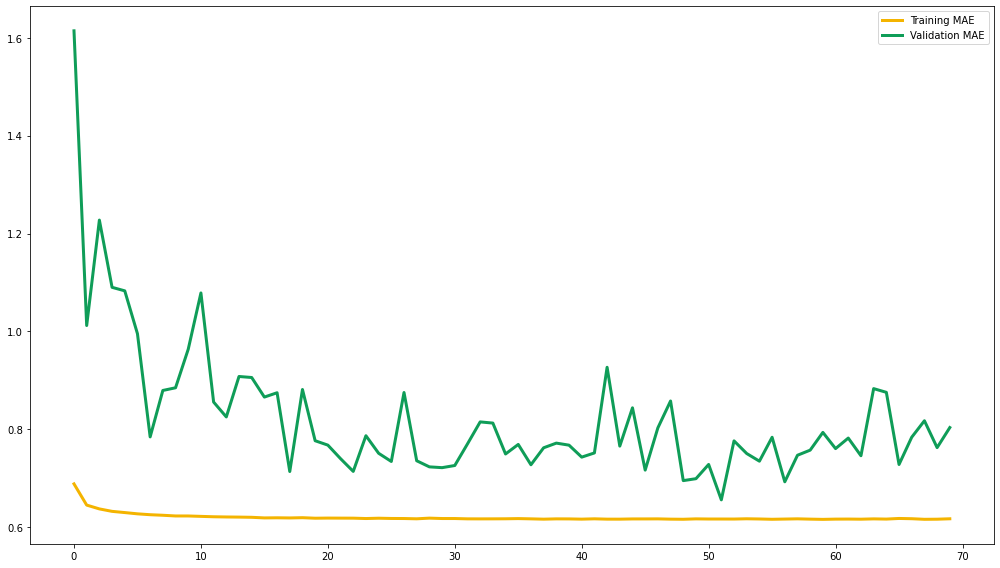

In [48]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(figsize=(14,8))
num_epochs = model_history.shape[0]
ax.plot(np.arange(0, num_epochs), model_history["mae"], 
        label="Training MAE", lw=3, color='#f4b400')
ax.plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="Validation MAE", lw=3, color='#0f9d58')
ax.legend()
plt.tight_layout()
plt.show()

In [51]:
test_unit = X_test.iloc[[0]]

test_pred = model.predict(test_unit).squeeze()
test_lbl = y_test.iloc[0]

print("Model prediction = {:.2f}".format(test_pred))
print("Actual value = {:.2f}".format(test_lbl))

Model prediction = 3.55
Actual value = 4.50
